In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
from matplotlib import pyplot as plt


In [2]:
data = np.array(pd.read_csv('data.csv'))

In [10]:
data[:,0]

399

/home/mtizim/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

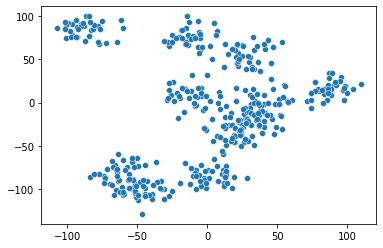

In [16]:
sns.scatterplot(data[:,0],data[:,1])

Na ludzkie oko wygląda jak zbiór z co najmniej czterema, a co najwyżej dziewięcioma kategoriami. Na moje oko, wyróżnia się osiem kategorii.

/home/mtizim/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

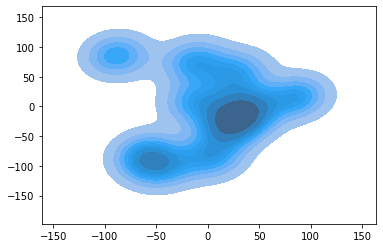

In [14]:
sns.kdeplot(data[:,0],data[:,1],fill=True)

Ale patrząc na wykres gęstości widzimy że równie dobrze mogą to być tylko trzy kategorie

# K means

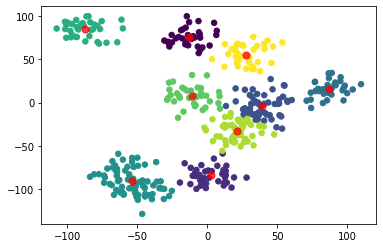

In [27]:
k = KMeans(n_clusters=9)
k.fit(data)
y = k.predict(data)
c = k.cluster_centers_
plt.scatter(data[:,0],data[:,1], c=y, s=30)
plt.scatter(c[:, 0], c[:, 1], c='red', s=50, alpha=0.75)

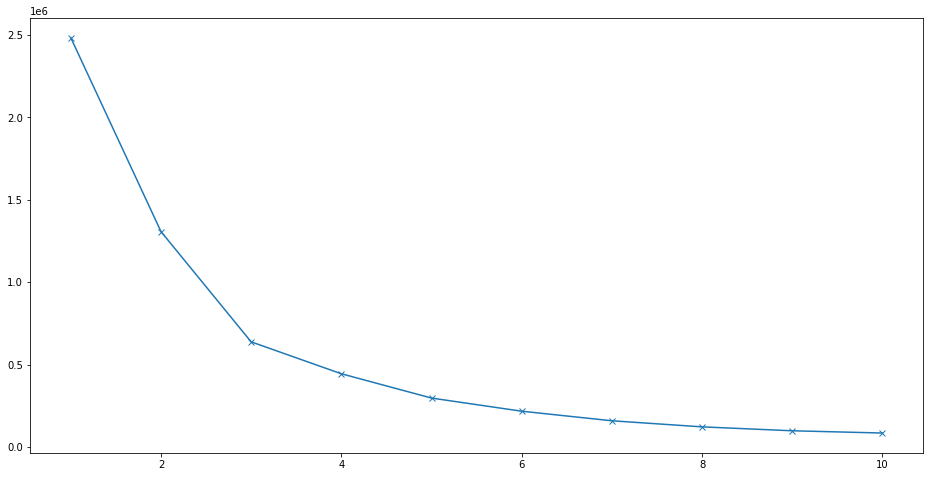

In [35]:
def kmeans_inertia(n):
    k = KMeans(n_clusters=n)
    k.fit(data)
    return k.inertia_

ns = range(1,11)
plt.figure(figsize=(16,8))
plt.plot(ns,[kmeans_inertia(n) for n in ns],'x-')


Według elbow method, dobrym predyktorem powinien być kmeans dla n=3.

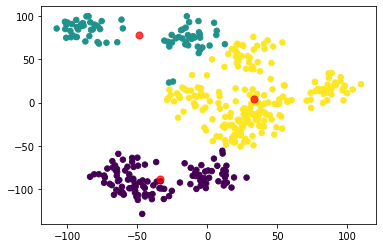

In [39]:
k = KMeans(n_clusters=3)
k.fit(data)
y = k.predict(data)
c = k.cluster_centers_
plt.scatter(data[:,0],data[:,1], c=y, s=30)
plt.scatter(c[:, 0], c[:, 1], c='red', s=50, alpha=0.75)

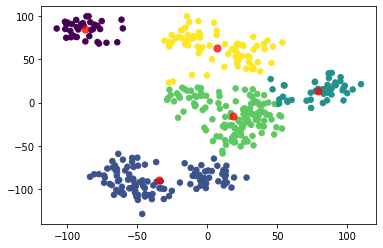

In [40]:
k = KMeans(n_clusters=5)
k.fit(data)
y = k.predict(data)
c = k.cluster_centers_
plt.scatter(data[:,0],data[:,1], c=y, s=30)
plt.scatter(c[:, 0], c[:, 1], c='red', s=50, alpha=0.75)

W praktyce, widać jednak że n=5 intuicyjnie lepiej wyjaśnia zbiór. Metoda zgięcia funkcji jest jednak wizualną heurystyką, a nie prawem

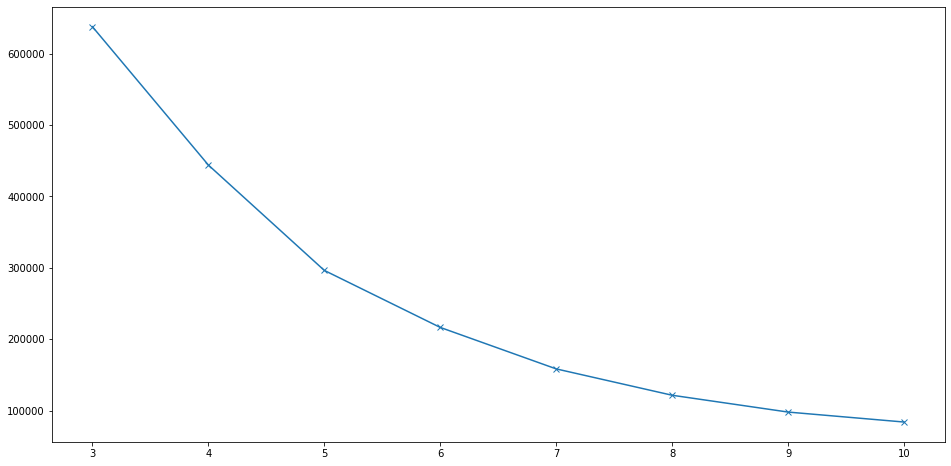

In [42]:
ns = range(3,11)
plt.figure(figsize=(16,8))
plt.plot(ns,[kmeans_inertia(n) for n in ns],'x-')


Zaczynając od n=3, n=5 wygląda bardziej jak zgięcie funkcji.

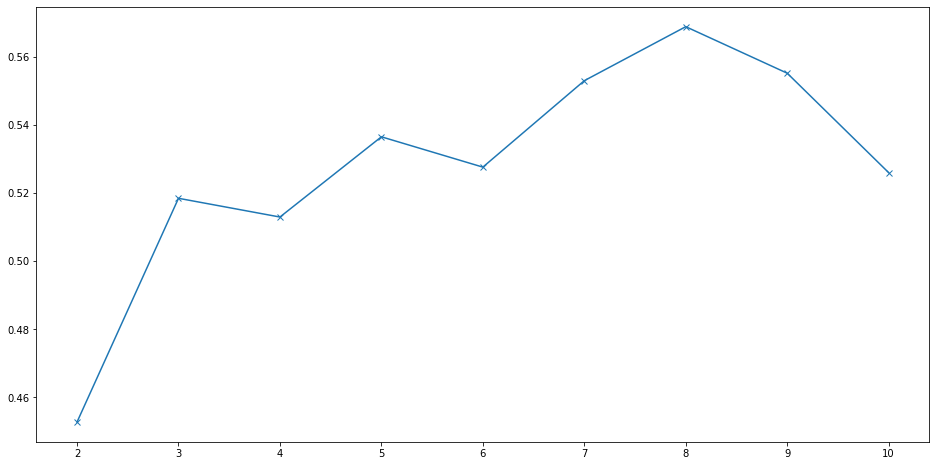

In [48]:
def kmeans_silhouette(n):
    k = KMeans(n_clusters=n)
    k.fit(data)
    return silhouette_score(data,k.predict(data))

ns = range(2,11)
plt.figure(figsize=(16,8))
plt.plot(ns,[kmeans_silhouette(n) for n in ns],'x-')



Według średniej metryki kształtu, n=9 jest optymalną liczbą clusterów. Widać, że n=5 jest lokalnym maksimum, co jest zgodne z tym co widzieliśmy przy wcześniejszej metryce, gdzie n=5 było punktem granicznym diminishing returns

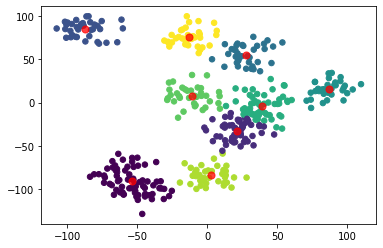

In [49]:
k = KMeans(n_clusters=9)
k.fit(data)
y = k.predict(data)
c = k.cluster_centers_
plt.scatter(data[:,0],data[:,1], c=y, s=30)
plt.scatter(c[:, 0], c[:, 1], c='red', s=50, alpha=0.75)

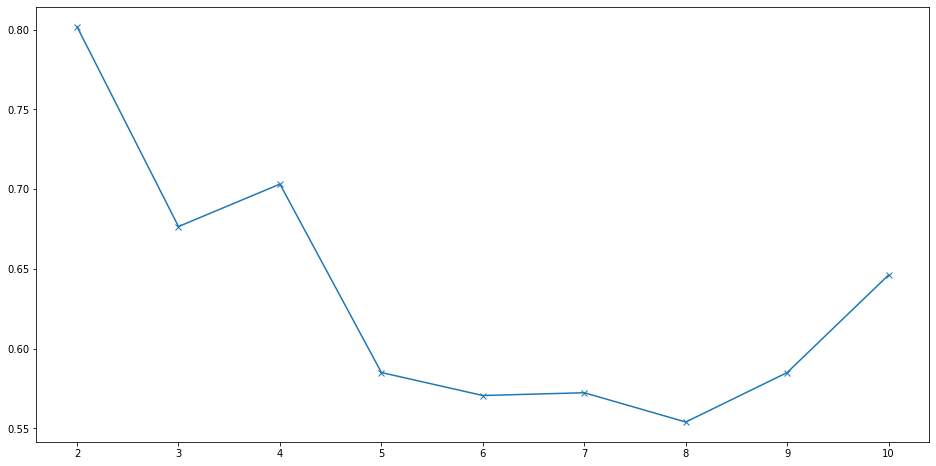

In [53]:
def kmeans_daviesbouldin(n):
    k = KMeans(n_clusters=n)
    k.fit(data)
    return davies_bouldin_score(data,k.predict(data))

ns = range(2,11)
plt.figure(figsize=(16,8))
plt.plot(ns,[kmeans_daviesbouldin(n) for n in ns],'x-')


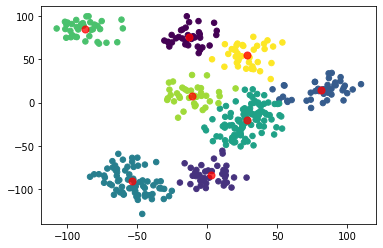

In [55]:
k = KMeans(n_clusters=8)
k.fit(data)
y = k.predict(data)
c = k.cluster_centers_
plt.scatter(data[:,0],data[:,1], c=y, s=30)
plt.scatter(c[:, 0], c[:, 1], c='red', s=50, alpha=0.75)

Według Daviesa-Bouldina, najlepsze jest n=8. Ten algorytm bierze pod uwagę odstępy między clusterami, więc przypadek n=9, gdzie są dwa dziwne środki w okolicach (-20,30) (na zielono na tym wykresie, na zielono + fioletowo na poprzednim), dostaje większą 'karę' za bardzo mały dystans.

# Agglomerative clustering

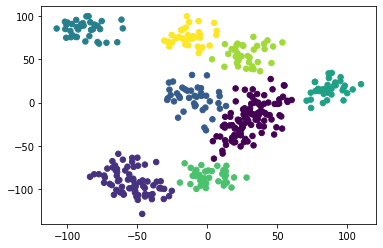

In [105]:
k = AgglomerativeClustering(n_clusters=8)
k.fit(data)
y = k.labels_
plt.scatter(data[:,0],data[:,1], c=y, s=30)

8


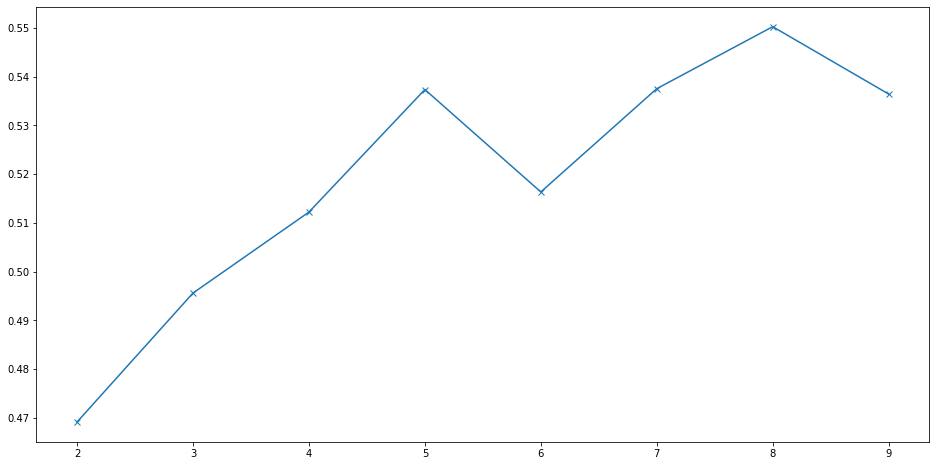

In [107]:
def agg_silhouette(n):
    k = AgglomerativeClustering(n_clusters=n)
    k.fit(data)
    return silhouette_score(data,k.labels_)

es = range(2,10)
ys = [agg_silhouette(e) for e in es]
plt.figure(figsize=(16,8))
plt.plot(es,ys,'x-')
print(es[np.argmax(ys)])


Według metryki kształtu, najlepszy wynik jest dla n = 8, podobnie jak intuicyjnie, oraz dla algorytmu KMeans

Wygląda to całkiem rozsądnie, ale DBSCAN nie rozdziela zbioru na samym środku, w przeciwieństwie do KMeansów. Przez małe różnice w gęstościach, nie jest to najlepszy zbiór do zastosowania DBSCANa

6


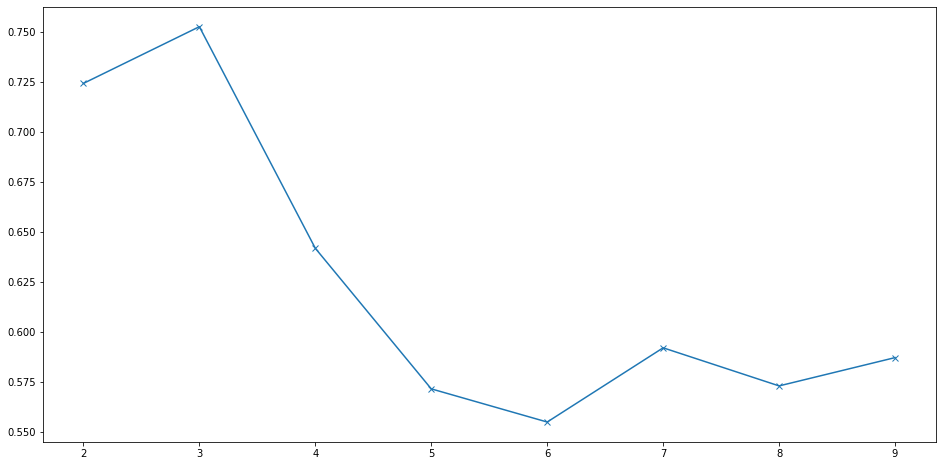

In [109]:
def agg_davbould(n):
    k = AgglomerativeClustering(n_clusters=n)
    k.fit(data)
    return davies_bouldin_score(data,k.labels_)

es = range(2,10)
ys = [agg_davbould(e) for e in es]
plt.figure(figsize=(16,8))
plt.plot(es,ys,'x-')
print(es[np.argmin(ys)])


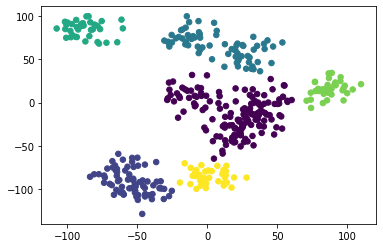

In [111]:
k = AgglomerativeClustering(n_clusters=6)
k.fit(data)
y = k.labels_
plt.scatter(data[:,0],data[:,1], c=y, s=30)

Biorąc pod uwagę metrykę Daviesa-Bouldina, dobryk wyborem jest również n=6. Wizualnie wygląda to akceptowalnie, a odległości między clusterami które ta metryka bierze rzeczywiście wyglądają na większe niż w przypadku n=8. Warto zauważyć, że według tej samej metryki, n=8 też jest dobrym wyborem.